In [23]:
import pytides2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from   datetime import datetime, timedelta
import matplotlib as mpl
import glob
import os
from matplotlib import cm
import matplotlib.dates as mdates
from matplotlib import font_manager as fm
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from netCDF4 import Dataset, num2date
import mat73
import scipy as sp
import warnings
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cdsapi
import seaborn as sns

warnings.filterwarnings('ignore')


plt.style.use('default')

In [24]:
path_font=r"G:\My Drive\TESIS_MAESTRIA_PAULAE\Fonts\Quicksand"

prop1 = fm.FontProperties(fname=path_font+'\Quicksand-Medium.ttf')
prop2 = fm.FontProperties(fname=path_font+'\Quicksand-SemiBold.ttf')
prop1.set_size(12)

In [25]:
def angulo_norte(x,y):
    if x > 0 and y > 0:
        theta = 90 - (np.arctan(abs(y/x))*(180/np.pi))
    elif x < 0 and y > 0:
        theta = 270 + (np.arctan(abs(y/x))*(180/np.pi))
    elif x < 0 and y < 0:
        theta = 270 - (np.arctan(abs(y/x))*(180/np.pi))
    else:
        theta = 90 + (np.arctan(abs(y/x))*(180/np.pi))
    return theta

# Lectura de datos

In [26]:
df_db = pd.read_csv('df_database.csv')
df_db

,Unnamed: 0,index,waterlevel,temp,sal,hs_wave,dir_wave,vel_wind,dir_wind,u_wind,v_wind,vel_flow,dir_flow,u_flow,v_flow,mes
0,0,46,0.260220,0.260220,0.260220,0.116837,0.116837,0.116837,45.000000,0.116837,0.116837,0.368006,45.0,0.260220,0.260220,1
1,1,47,0.263163,0.263163,0.263163,0.122465,0.122465,0.122465,45.000000,0.122465,0.122465,0.372168,45.0,0.263163,0.263163,1
2,2,48,0.258976,0.258976,0.258976,0.130494,0.130494,0.130494,45.000000,0.130494,0.130494,0.366247,45.0,0.258976,0.258976,1
3,3,49,0.256825,0.256825,0.256825,0.140012,0.140012,0.140012,45.000000,0.140012,0.140012,0.363206,45.0,0.256825,0.256825,1
4,4,50,0.258829,0.258829,0.258829,0.149988,0.149988,0.149988,45.000000,0.149988,0.149988,0.366040,45.0,0.258829,0.258829,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221371,221371,20939,0.218121,28.110162,35.755665,1.887047,87.019027,9.213161,259.490423,-8.908047,-1.652549,0.781339,225.0,-0.552490,-0.552490,12
221372,221372,20940,0.222498,28.105264,35.748895,1.888027,87.102830,9.229263,259.621510,-8.930887,-1.635659,0.802535,225.0,-0.567478,-0.567478,12
221373,221373,20941,0.226166,28.097134,35.737414,1.888999,87.187034,9.245683,259.752242,-8.953703,-1.618732,0.822391,225.0,-0.581518,-0.581518,12
221374,221374,20942,0.229069,28.081057,35.720507,1.889970,87.271393,9.257756,259.873328,-8.972129,-1.602489,0.838176,225.0,-0.592680,-0.592680,12


# EDA 

In [27]:
df_db_1 = df_db[['waterlevel', 'temp', 'sal', 'hs_wave', 'dir_wave', 'vel_wind', 'dir_wind','mes','vel_flow', 'dir_flow']]
df_db_1

,waterlevel,temp,sal,hs_wave,dir_wave,vel_wind,dir_wind,mes,vel_flow,dir_flow
0,0.260220,0.260220,0.260220,0.116837,0.116837,0.116837,45.000000,1,0.368006,45.0
1,0.263163,0.263163,0.263163,0.122465,0.122465,0.122465,45.000000,1,0.372168,45.0
2,0.258976,0.258976,0.258976,0.130494,0.130494,0.130494,45.000000,1,0.366247,45.0
3,0.256825,0.256825,0.256825,0.140012,0.140012,0.140012,45.000000,1,0.363206,45.0
4,0.258829,0.258829,0.258829,0.149988,0.149988,0.149988,45.000000,1,0.366040,45.0
...,...,...,...,...,...,...,...,...,...,...
221371,0.218121,28.110162,35.755665,1.887047,87.019027,9.213161,259.490423,12,0.781339,225.0
221372,0.222498,28.105264,35.748895,1.888027,87.102830,9.229263,259.621510,12,0.802535,225.0
221373,0.226166,28.097134,35.737414,1.888999,87.187034,9.245683,259.752242,12,0.822391,225.0
221374,0.229069,28.081057,35.720507,1.889970,87.271393,9.257756,259.873328,12,0.838176,225.0


## Correlación de variables

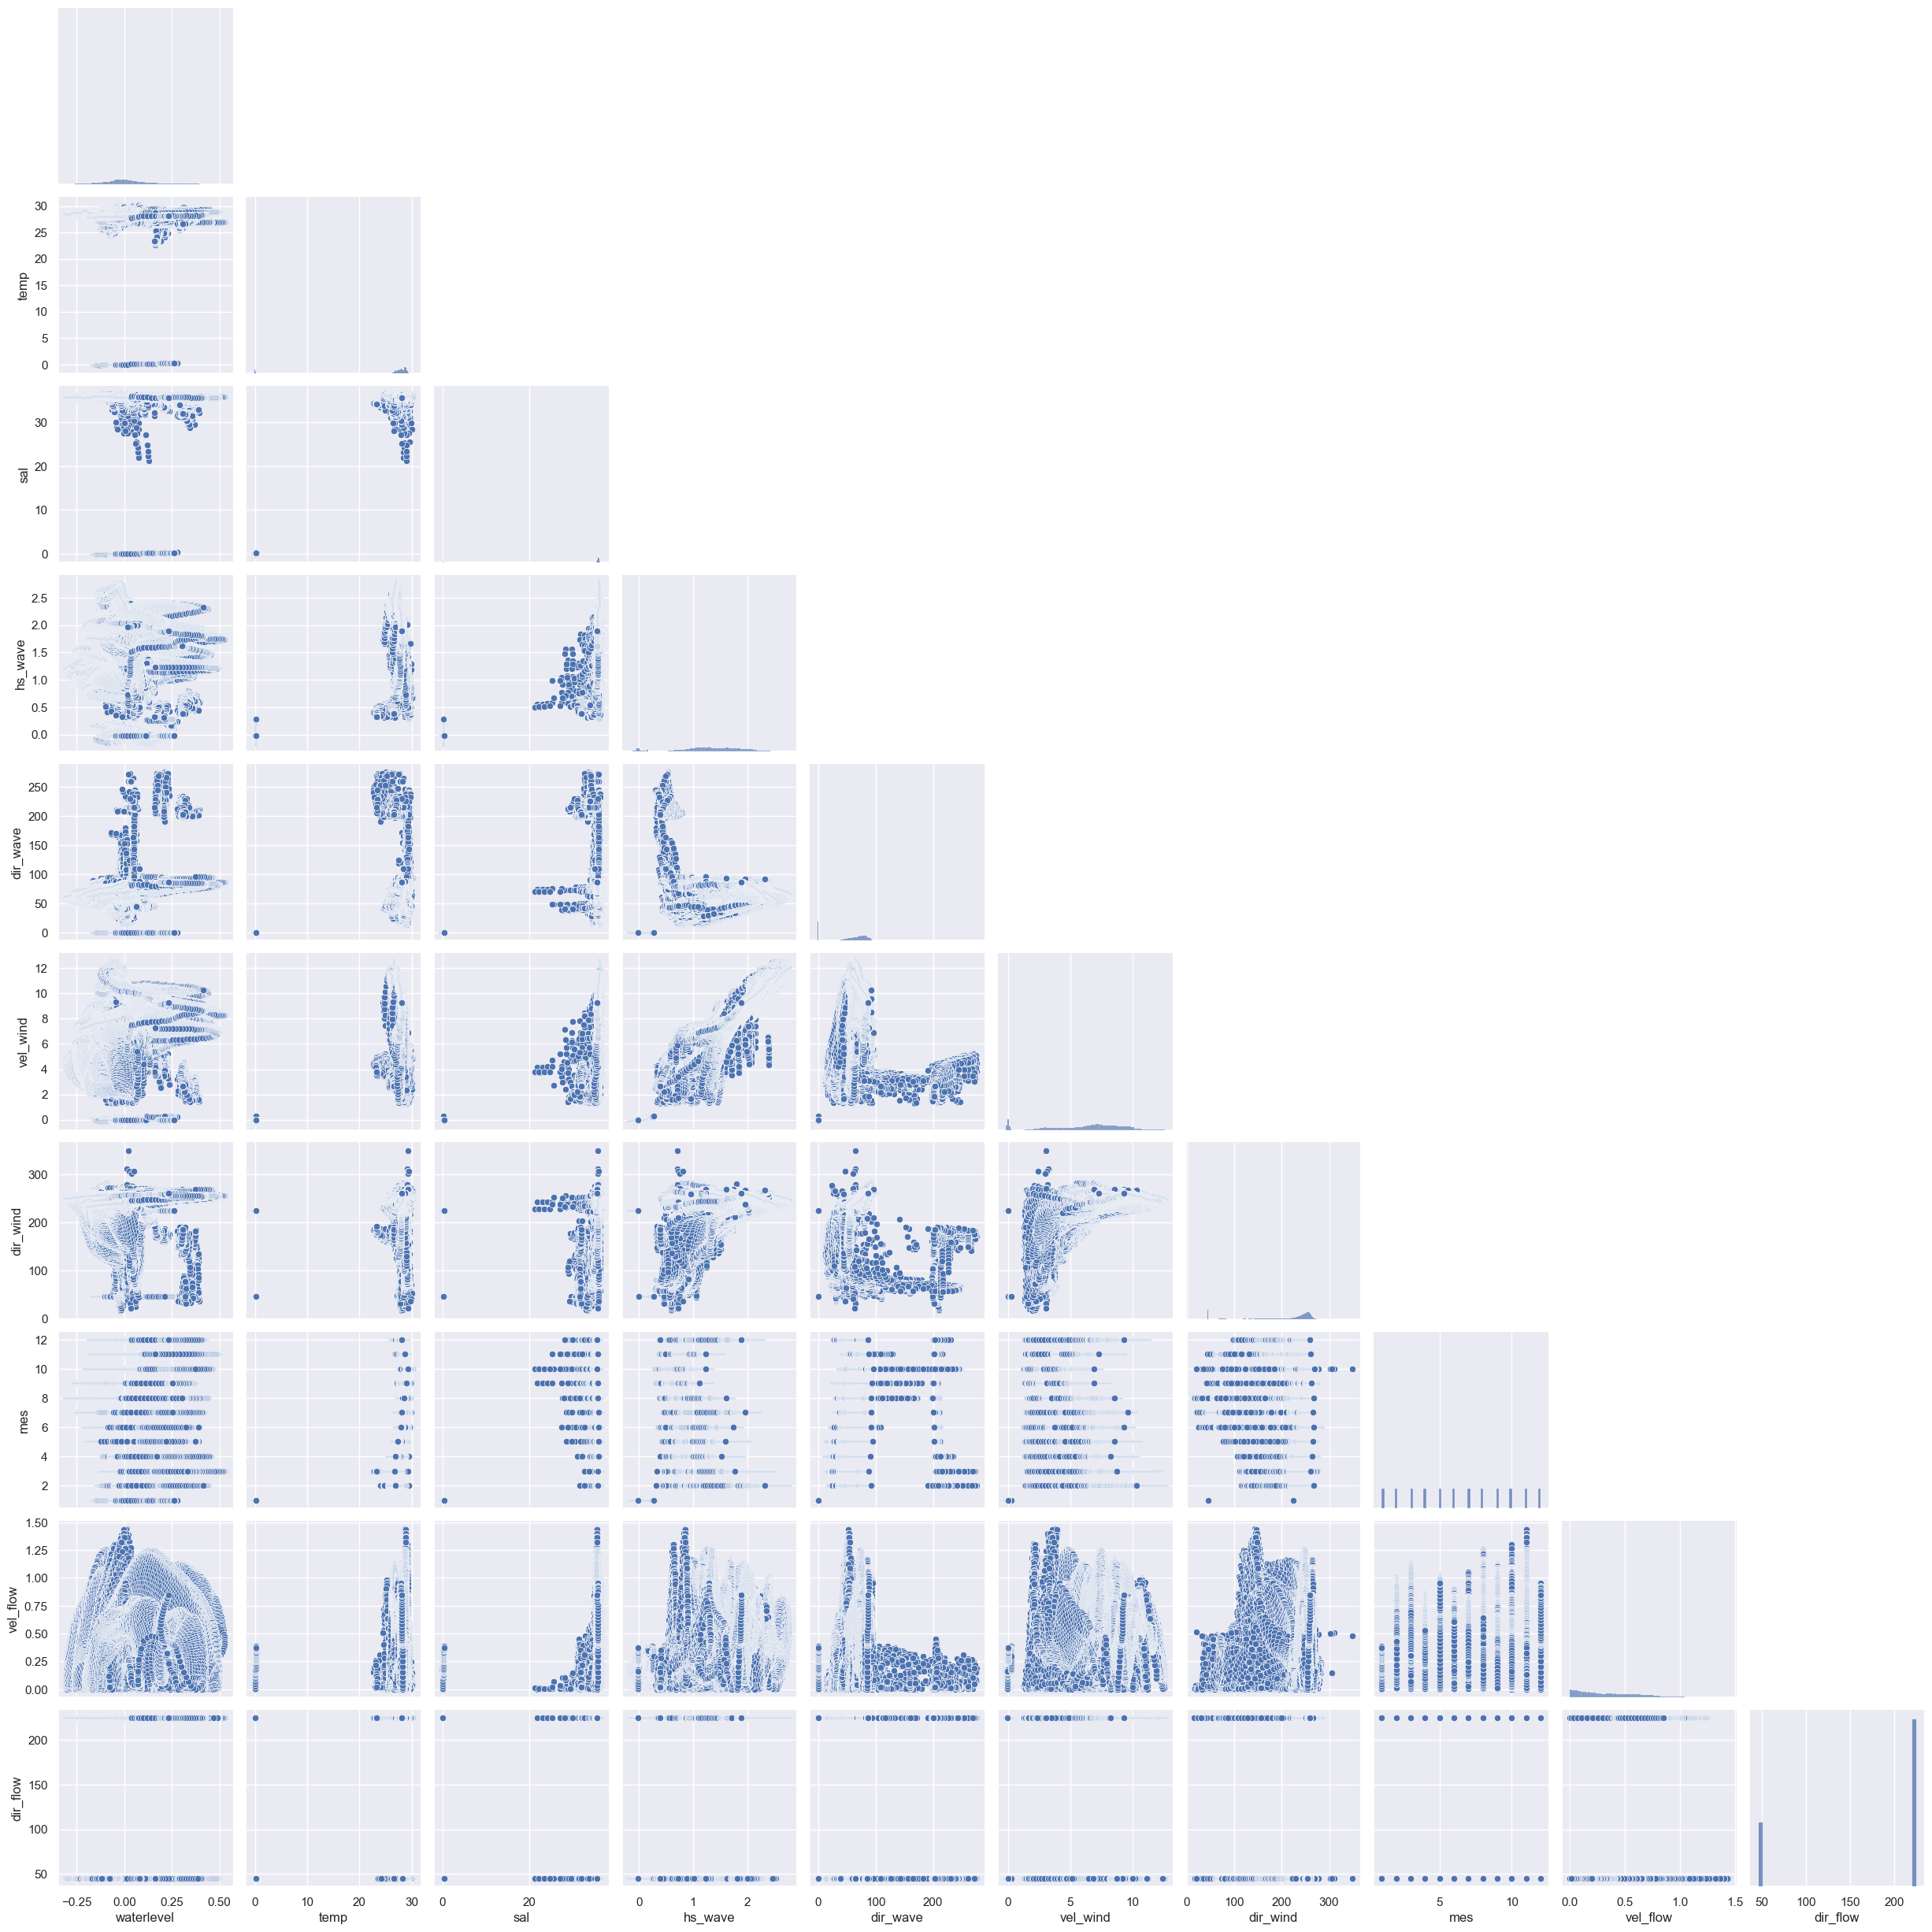

In [28]:
sns.set()
ax = sns.pairplot(data = df_db_1, corner = True)

## Matriz de correlación

<AxesSubplot:>

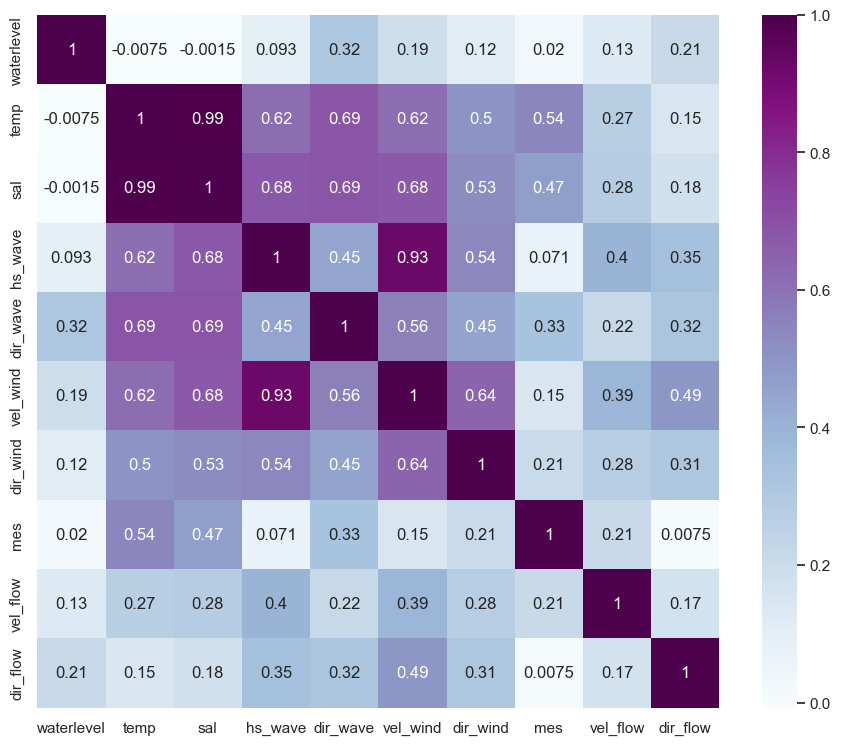

In [29]:
fig, ax = plt.subplots(figsize=(11,9))
cor = df_db_1.corr()
colormap = cm.BuPu
sns.heatmap(cor, annot=True, cmap=colormap)
# ax.set_yticklabels(ax.get_yticks(), fontproperties=prop1,color='gray',size = 12)
# ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12)# ax.set_xlabel


<AxesSubplot:>

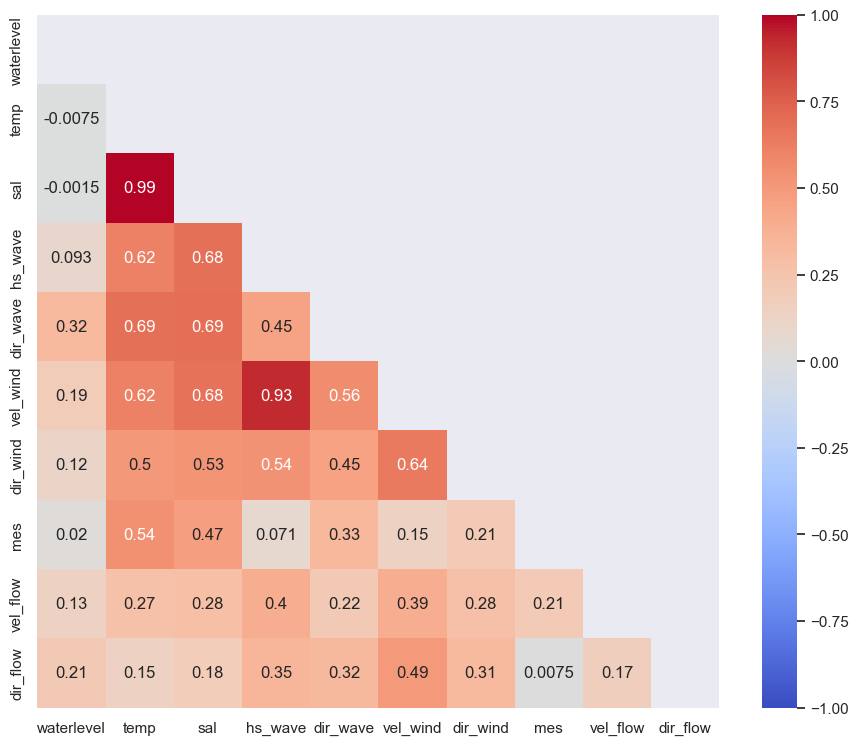

In [30]:
fig, ax = plt.subplots(figsize=(11,9))

corr = df_db_1.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix, cmap=plt.cm.coolwarm, center = 0, vmin=-1,vmax=1)

In [31]:
df_db[df_db['dir_wind']>400]

,Unnamed: 0,index,waterlevel,temp,sal,hs_wave,dir_wave,vel_wind,dir_wind,u_wind,v_wind,vel_flow,dir_flow,u_flow,v_flow,mes


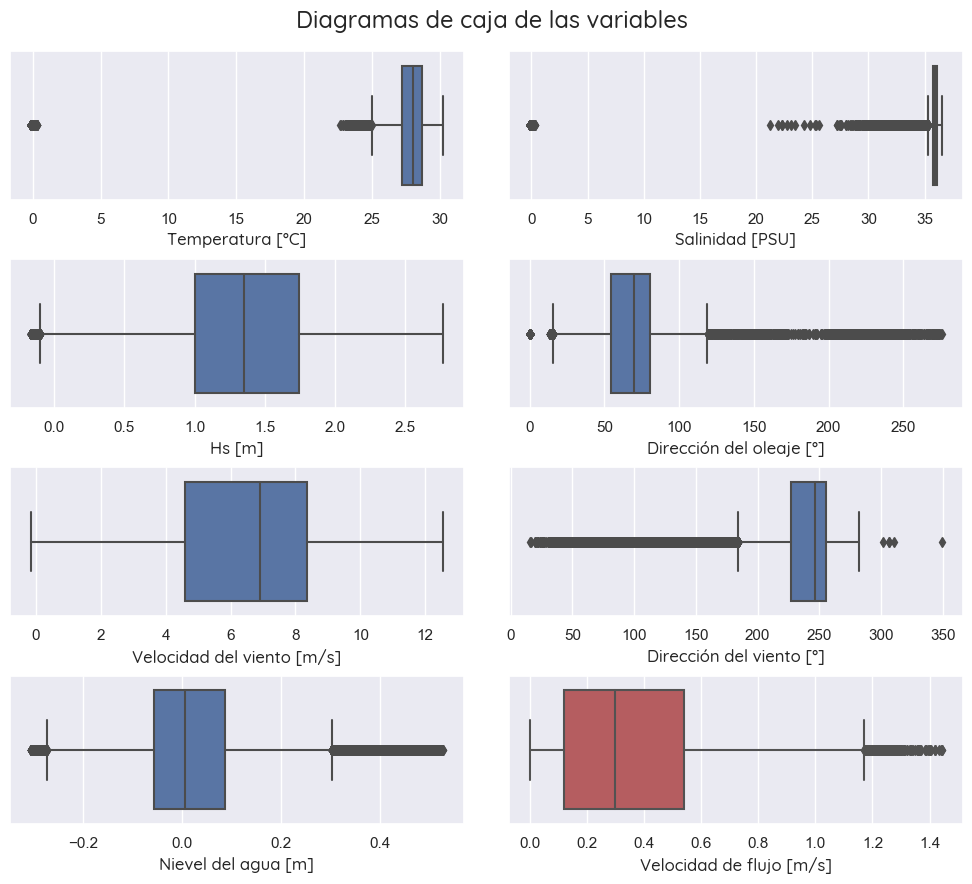

In [32]:
fig, axs = plt.subplots(4,2, figsize =(10,9))
sns.boxplot(x='temp', data=df_db_1, ax= axs[0,0])
sns.boxplot(x='sal', data=df_db_1, ax= axs[0,1])
sns.boxplot(x='hs_wave', data=df_db_1, ax= axs[1,0])
sns.boxplot(x='dir_wave', data=df_db_1, ax= axs[1,1])
sns.boxplot(x='vel_wind', data=df_db_1, ax= axs[2,0])
sns.boxplot(x='dir_wind', data=df_db_1, ax= axs[2,1])
sns.boxplot(x='waterlevel', data=df_db_1, ax= axs[3,0])
sns.boxplot(x='vel_flow', data=df_db_1, ax= axs[3,1], color = 'r')
axs[0,0].set_xlabel('''Temperatura [°C]''',fontweight ="bold",size=12, fontproperties=prop1)
axs[0,1].set_xlabel('''Salinidad [PSU]''',fontweight ="bold",size=12, fontproperties=prop1)
axs[1,0].set_xlabel('''Hs [m]''',fontweight ="bold",size=12, fontproperties=prop1)
axs[1,1].set_xlabel('''Dirección del oleaje [°]''',fontweight ="bold",size=12, fontproperties=prop1)
axs[2,0].set_xlabel('''Velocidad del viento [m/s]''',fontweight ="bold",size=12, fontproperties=prop1)
axs[2,1].set_xlabel('''Dirección del viento [°]''',fontweight ="bold",size=12, fontproperties=prop1)
axs[3,0].set_xlabel('''Nievel del agua [m]''',fontweight ="bold",size=12, fontproperties=prop1)
axs[3,1].set_xlabel('''Velocidad de flujo [m/s]''',fontweight ="bold",size=12, fontproperties=prop1)
# axs[0,0].set_xticklabels(axs[0,0].get_xticks().round(2), fontproperties=prop1,color='gray',size = 12)
# axs[0,1].set_xticklabels(axs[0,1].get_xticks().round(2), fontproperties=prop1,color='gray',size = 12)
# axs[1,0].set_xticklabels(axs[1,0].get_xticks().round(2), fontproperties=prop1,color='gray',size = 12)
# axs[1,1].set_xticklabels(axs[1,1].get_xticks().round(2), fontproperties=prop1,color='gray',size = 12)
# axs[2,0].set_xticklabels(axs[2,0].get_xticks().round(3), fontproperties=prop1,color='gray',size = 12)
# axs[2,1].set_xticklabels(axs[2,1].get_xticks().round(2), fontproperties=prop1,color='gray',size = 12)
# axs[3,0].set_xticklabels(axs[3,0].get_xticks().round(2), fontproperties=prop1,color='gray',size = 12)
# axs[3,1].set_xticklabels(axs[3,1].get_xticks().round(2), fontproperties=prop1,color='gray',size = 12);
fig.suptitle('Diagramas de caja de las variables',size=17,fontproperties=prop1);
fig.tight_layout()
plt.subplots_adjust(wspace=0.1)
plt.subplots_adjust(hspace=0.4)

Text(0.5, 0, 'Dirección del flujo [°]')

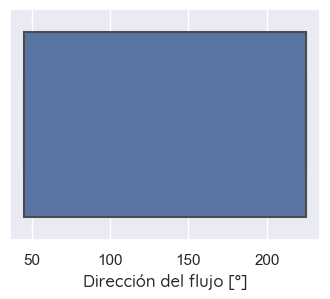

In [33]:
fig, axs = plt.subplots(figsize =(4,3))
sns.boxplot(x='dir_flow', data=df_db_1, ax= axs)
axs.set_xlabel('''Dirección del flujo [°]''',fontweight ="bold",size=12, fontproperties=prop1)


# Selección de variables

Este método es útil para modelos no supervisados, ya que sólo utiliza como criterio la mayor varianza en las variables. Si el valor del umbral es 0 remueve solo las variables de varianza constante. Utilizar un umbral de 0.01 significa eliminar las columnas donde el 99% de los valores son similares.

In [34]:
X = df_db_1.iloc[:,:-2]
Y1 = df_db_1.iloc[:,-2] # Obtener la variable predictora Y1
Y2 = df_db_1.iloc[:,-1] # Obtener 

In [35]:
df_db_1

,waterlevel,temp,sal,hs_wave,dir_wave,vel_wind,dir_wind,mes,vel_flow,dir_flow
0,0.260220,0.260220,0.260220,0.116837,0.116837,0.116837,45.000000,1,0.368006,45.0
1,0.263163,0.263163,0.263163,0.122465,0.122465,0.122465,45.000000,1,0.372168,45.0
2,0.258976,0.258976,0.258976,0.130494,0.130494,0.130494,45.000000,1,0.366247,45.0
3,0.256825,0.256825,0.256825,0.140012,0.140012,0.140012,45.000000,1,0.363206,45.0
4,0.258829,0.258829,0.258829,0.149988,0.149988,0.149988,45.000000,1,0.366040,45.0
...,...,...,...,...,...,...,...,...,...,...
221371,0.218121,28.110162,35.755665,1.887047,87.019027,9.213161,259.490423,12,0.781339,225.0
221372,0.222498,28.105264,35.748895,1.888027,87.102830,9.229263,259.621510,12,0.802535,225.0
221373,0.226166,28.097134,35.737414,1.888999,87.187034,9.245683,259.752242,12,0.822391,225.0
221374,0.229069,28.081057,35.720507,1.889970,87.271393,9.257756,259.873328,12,0.838176,225.0


In [36]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01) # Umbral del 1% 
selector.fit(X)
print(selector.get_support())
X.columns[selector.get_support()]

[ True  True  True  True  True  True  True  True]


Index(['waterlevel', 'temp', 'sal', 'hs_wave', 'dir_wave', 'vel_wind',
       'dir_wind', 'mes'],
      dtype='object')

## Selección de variables univariado

Este método univariable utiliza para seleccionar las variables que tenga la relación mas fuerte con la variable dependiente. Permite seleccionar diferentes *test estadísticos* para seleccionar el número de variables especificado.

Para regresión permite utilizar como *score_func* métodos como *f_regression*, *mutual_info_regression*, y para problemas de clasificación *chi2*, f*_classif*, *mutual_info_classif*. El argumento *k* define el número de variables que deben permanecer eliminando las otras de menor desempeño segun el *score_func*.

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

#-----------------Seleción de variables para la MAGNITUD de la velocidad-----------------
variables = SelectKBest(score_func=mutual_info_regression, k=3)
variables.fit(X,Y1)
print(variables.get_params)
X.columns[variables.get_support()]

<bound method BaseEstimator.get_params of SelectKBest(k=3,
            score_func=<function mutual_info_regression at 0x0000014E34C4B550>)>


Index(['waterlevel', 'temp', 'sal'], dtype='object')

In [38]:
#-----------------Seleción de variables para la dirección de la velocidad-----------------
variables = SelectKBest(score_func=mutual_info_regression, k=3)
variables.fit(X,Y2)
print(variables.get_params)
X.columns[variables.get_support()]

<bound method BaseEstimator.get_params of SelectKBest(k=3,
            score_func=<function mutual_info_regression at 0x0000014E34C4B550>)>


Index(['sal', 'dir_wave', 'vel_wind'], dtype='object')

## Selección de variables con *Recursive Feature Elimination (RFE)*

En este métodos se utiliza un modelo de *machine learning* para seleccionar las variables, eliminando las de menor importancia en un proceso iterativo. El argumento *step* corresponde al número de variables eliminadas en cada iteración.

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
rfe=RFE(estimator=LinearRegression(),n_features_to_select = 4, step = 1)
fit=rfe.fit(X,Y1)
print(fit.n_features_)
print(X.columns[fit.support_])
print(fit.ranking_)

4
Index(['waterlevel', 'temp', 'sal', 'hs_wave'], dtype='object')
[1 1 1 1 5 3 4 2]


In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
rfe=RFE(estimator=LinearRegression(),n_features_to_select = 4, step = 1)
fit=rfe.fit(X,Y1)
print(fit.n_features_)
print(X.columns[fit.support_])
print(fit.ranking_)

4
Index(['waterlevel', 'temp', 'hs_wave', 'vel_wind'], dtype='object')
[1 1 2 1 3 1 5 4]


## Selección de variables con *SelectFromModel*

Este modelo es similar al *RFE*, la diferencia radica en que este está basado en la importancia de los atributos, utilizando como umbral por defecto la media. Como resultado entrega las variables que pasan el umbral.

In [41]:
from sklearn.feature_selection import SelectFromModel
sfm_selector = SelectFromModel(estimator=LinearRegression())
sfm_selector.fit(X, Y1)
X.columns[sfm_selector.get_support()]

Index(['waterlevel', 'hs_wave'], dtype='object')

In [42]:
from sklearn.feature_selection import SelectFromModel
sfm_selector = SelectFromModel(estimator=LinearRegression())
sfm_selector.fit(X, Y2)
X.columns[sfm_selector.get_support()]

Index(['hs_wave', 'vel_wind'], dtype='object')

## Selección de variables con *Sequential Feature Selection* (SFS)
Este método utiliza validación cruzada y se desplaza hacia delante (*SFS-Forward*) o atras (*SFS-Backward*) para seleccionar las mejores variables. Inicia con cero variables y encuentra la que mejor optimiza la métrica de la validación cruzada, de esta forma selecciona esta variable y repite el procedimiento para la segunda y demas variables.

In [43]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select = 3, cv =10, direction ='backward')
sfs_selector.fit(X, Y1)
X.columns[sfs_selector.get_support()]

Index(['temp', 'sal', 'dir_wind'], dtype='object')

In [44]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs_selector = SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select = 3, cv =10, direction ='backward')
sfs_selector.fit(X, Y2)
X.columns[sfs_selector.get_support()]

Index(['temp', 'hs_wave', 'vel_wind'], dtype='object')

## Selección de variables con ELI5
Este método evalua la importancia de cada variable utilizando la *sensitivity* permutando aleatoriamente los valores de las variables.

In [45]:
import eli5
from eli5.sklearn import PermutationImportance

In [46]:
model = LinearRegression()
model.fit(X,Y1)
perm = PermutationImportance(model).fit(X, Y1)
eli5.show_weights(model)

Weight?,Feature
+0.222,x3
+0.159,x0
+0.032,<BIAS>
+0.027,x1
+0.014,x7
+0.002,x5
+0.000,x6
-0.000,x4
-0.026,x2


In [47]:
X.columns[0], X.columns[3]

('waterlevel', 'hs_wave')

In [48]:
model = LinearRegression()
model.fit(X,Y2)
perm = PermutationImportance(model).fit(X, Y2)
eli5.show_weights(model)

Weight?,Feature
+139.186,<BIAS>
+33.461,x5
+3.543,x2
+0.606,x0
+0.418,x4
+0.263,x7
-0.073,x6
-7.151,x1
-90.099,x3


In [49]:
X.columns[5], X.columns[3]

('vel_wind', 'hs_wave')

In [50]:
import shap
from sklearn.ensemble import RandomForestRegressor

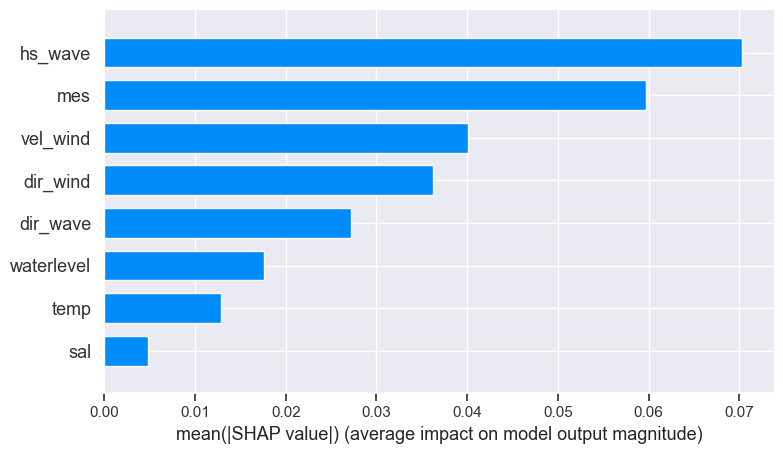

In [40]:
model = RandomForestRegressor(max_depth=6, n_estimators=10)
model.fit(X, Y1)
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

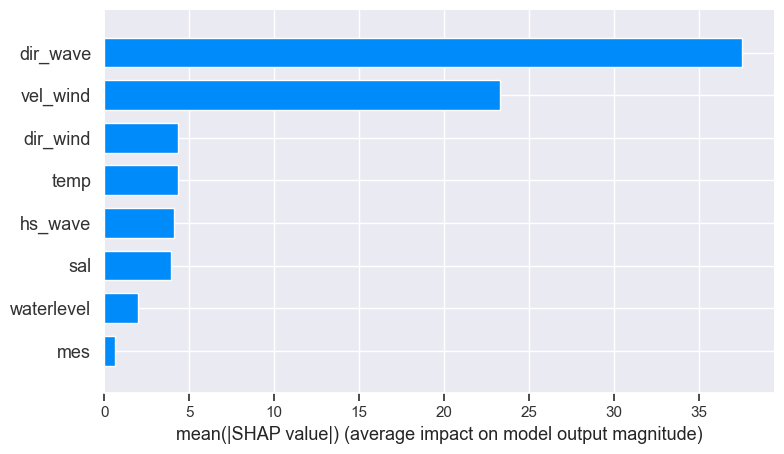

In [41]:
model = RandomForestRegressor(max_depth=6, n_estimators=10)
model.fit(X, Y2)
shap_values = shap.TreeExplainer(model).shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

# Validación

Hcaer un split (train (entrenar), test (validar)) de los datos para evaluar el desempeño del modelo. 

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


In [52]:
# ## Selección de variables con *Recursive Feature Elimination (RFE)*
# X1 = df_db_1[['waterlevel', 'temp', 'sal', 'hs_wave']]
X1 = df_db_1[['waterlevel', 'temp', 'hs_wave', 'vel_wind']]

In [53]:
from sklearn.model_selection import train_test_split

X_train ,X_test , y_train1,y_test1 = train_test_split(X1,Y1, train_size=0.8, random_state=1) # Random state para definir que sea la misma partición (split)
X_train ,X_test , y_train2,y_test2 = train_test_split(X1,Y2, train_size=0.8, random_state=1)


print('Dimensiones de la matriz para entrenar:',X_train.shape)
print('Dimensiones de la matriz para validar:',X_test.shape)
print('Dimensiones del vector para entrenar:',y_train1.shape)
print('Dimensiones del vector para validar:',y_test1.shape)
print('Dimensiones del vector para entrenar:',y_train2.shape)
print('Dimensiones del vector para validar:',y_test2.shape)

Dimensiones de la matriz para entrenar: (177100, 4)
Dimensiones de la matriz para validar: (44276, 4)
Dimensiones del vector para entrenar: (177100,)
Dimensiones del vector para validar: (44276,)
Dimensiones del vector para entrenar: (177100,)
Dimensiones del vector para validar: (44276,)


## *K-fold*

El método de *K-fold Cross Validation* permite obtener el desempeño del algoritmo con menor varianza que un particion sencilla de *train-test set split*. Este metodo divide lso datos en un número de K subconjuntos (k = 5 ó k = 10). Cada partición es denominada un *fold*. El algoritmo es entonces entrenado con K-1 subconjuntos y un subconjunto es utilizado para validar. Esto es k veces repetido por lo que se obtienen k valores de *score*. El algoritmo es por lo tanto entrenado y evaluado múltiples veces. Como resultado de esta función no se obtiene un modelo, ya que varios modelos son creados internamente, el propósito es sólamente evaluar que tan bien un algoritmo determinado va a generalizar con otros datos diferentes al entrenamiento.

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [55]:
from sklearn.ensemble import RandomForestRegressor
# Permite evaluar que tambien un algoritmo generaliza con difernetes arreglos las predicciones de mi modelo 

#----------- Para la magnitud---------------------------
kfold = KFold(n_splits=5, shuffle= True,random_state=1)
model = RandomForestRegressor()
results1 = cross_val_score(model, X_train, y_train1, cv=kfold, scoring='r2') # Obtengo la metrica R2  de cada k-fold (Conjunto de datos)
results2 = cross_val_score(model, X_train, y_train2, cv=kfold, scoring='r2') # Obtengo la metrica R2  de cada k-fold (Conjunto de datos)

print(results1, '\n' , results2)
print(results1.mean())
print(results1.std())

[0.95381725 0.95279139 0.95381665 0.95723126 0.95665122] 
 [0.89207478 0.89343872 0.89712954 0.89956599 0.89434395]
0.9548615542905063
0.0017485056189622415


In [56]:
#-------------------Para la dirección--------------------------------
kfold = KFold(n_splits=5, shuffle= True,random_state=1)
model = RandomForestRegressor()
results = cross_val_score(model, X_train, y_train2, cv=kfold, scoring='r2') # Obtengo la metrica R2 de cada k-fold (Conjunto de datos)
print(results)
print(results.mean())
print(results.std())

NameError: name 'X_train2' is not defined

A continuación se presenta la función *cross_validate*, la cual difiere de *cross_val_score* ya que permite definir múltiples métricas para estimar el ajuste, adicionalmente las salidas de la función son diferentes como se observa a continuación. Por defecto la función *cross_val_score* genera 3 particiones.

In [57]:
from sklearn.model_selection import cross_validate
results_ridge = cross_validate(Ridge(),X,Y1,return_train_score=True,cv=5)
print(results_ridge)

test_scores = results_ridge['test_score']
train_scores = results_ridge['train_score']
print('Train scores:', np.mean(train_scores))
print('Test scores:', np.mean(test_scores))

{'fit_time': array([0.04975367, 0.02599978, 0.02845621, 0.02900052, 0.02649426]), 'score_time': array([0.00400019, 0.00400114, 0.00399947, 0.00399971, 0.00299978]), 'test_score': array([-38.92188114,   0.18605177,   0.14664711,  -0.09151826,
        -1.76880072]), 'train_score': array([0.15043021, 0.2036287 , 0.21916447, 0.26725201, 0.34040847])}
Train scores: 0.23617677378866583
Test scores: -8.089900245856553


In [58]:
results_ridge = cross_validate(Ridge(),X,Y2,return_train_score=True,cv=5)
print(results_ridge)

test_scores = results_ridge['test_score']
train_scores = results_ridge['train_score']
print('Train scores:', np.mean(train_scores))
print('Test scores:', np.mean(test_scores))

{'fit_time': array([0.02697253, 0.02680111, 0.02162099, 0.02258635, 0.0271914 ]), 'score_time': array([0.00500035, 0.00235152, 0.00199962, 0.00226569, 0.00299931]), 'test_score': array([-55.81689656,   0.34905928,   0.46772214,   0.3120161 ,
         0.35493229]), 'train_score': array([0.4218057 , 0.35938391, 0.33630019, 0.3771662 , 0.35956831])}
Train scores: 0.3708448614766276
Test scores: -10.866633350167508


In [59]:
results_lasso = cross_validate(Lasso(),X,Y1,return_train_score=True,cv=5)
print(results_lasso)

test_scores = results_lasso['test_score']
train_scores = results_lasso['train_score']
print('Train scores:', np.mean(train_scores))
print('Test scores:', np.mean(test_scores))

{'fit_time': array([0.04606318, 0.04280281, 0.03436208, 0.03246593, 0.0310266 ]), 'score_time': array([0.00399899, 0.00200009, 0.00199914, 0.00299954, 0.00439453]), 'test_score': array([-0.327068  ,  0.03500974,  0.02708148, -0.0248976 , -0.00259609]), 'train_score': array([0.02034762, 0.08294248, 0.08593076, 0.0874085 , 0.08652515])}
Train scores: 0.07263090222268487
Test scores: -0.058494095033935746


In [60]:
results_lasso = cross_validate(Lasso(),X,Y2,return_train_score=True,cv=5)
print(results_lasso)

test_scores = results_lasso['test_score']
train_scores = results_lasso['train_score']
print('Train scores:', np.mean(train_scores))
print('Test scores:', np.mean(test_scores))

{'fit_time': array([0.10668349, 0.1407752 , 0.67835665, 0.67418909, 0.21978641]), 'score_time': array([0.00440001, 0.00299978, 0.00400519, 0.00302386, 0.00218606]), 'test_score': array([-32.5152957 ,   0.36345264,   0.44851264,   0.29989601,
         0.36586537]), 'train_score': array([0.40913542, 0.35316233, 0.32940978, 0.37126186, 0.35001172])}
Train scores: 0.3625962209318509
Test scores: -6.2075138065043305


### Leave One Out Cross Validation
Un caso especial de *K-fold cross validation* es donde k sea igual al número de observaciones. Este tipo de variación se denomina *leave-one-out cross validation*

In [ ]:
# from sklearn.model_selection import LeaveOneOut
# loocv = LeaveOneOut()
# model = LinearRegression()
# results = cross_val_score(model, X1, Y1, cv=loocv, scoring='r2')
# print(results.mean())
# print(results.std())

In [ ]:
# loocv = LeaveOneOut()
# model = LinearRegression()
# results = cross_val_score(model, X2, Y2, cv=loocv, scoring='r2')
# print(results.mean())
# print(results.std())

### ShuffleSplit
Otra variación de *k-fold* es generar una partición aleatoria como *train-test-split*, pero repite el proceso de partición y evaluación múltiples veces como *K-fold*.

In [61]:
from sklearn.model_selection import ShuffleSplit

#----------- Para magnitud-------------------------------------
kfold = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
model = LinearRegression()
results = cross_val_score(model, X, Y1, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

[0.21171364 0.21412845 0.21119317 0.20948451 0.20823801]
0.21095155609986946
0.0020123286777245747


In [62]:

#----------- Para la dirección-------------------------------------
kfold = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1)
model = LinearRegression()
results = cross_val_score(model, X, Y2, cv=kfold, scoring='r2')
print(results)
print(results.mean())
print(results.std())

[0.36723701 0.36624365 0.36574315 0.36320061 0.35985446]
0.36445577435246157
0.0026584431931508507


# Selección de hiperparámetros

## Curva de validación con Sklearn

La Curva de Vallidación visualiza la métrica del desempeño del modelo sobre un rango de valores para algún hiperparámetro. Es por lo tanto utilizado para seleccionar los hiperparámetros que maximicen el desempeño del modelo.

In [67]:
from sklearn.neighbors import KNeighborsRegressor
results=cross_validate(KNeighborsRegressor(n_neighbors=2), X, Y1, cv=5)
results

{'fit_time': array([0.23454499, 0.29068041, 0.18883038, 0.19222546, 0.18463182]),
 'score_time': array([0.59897709, 0.63536882, 0.6732378 , 0.65991521, 0.93567133]),
 'test_score': array([ 0.01393336, -0.13731563, -0.41201517, -0.49421287, -0.48945234])}

In [68]:
from sklearn.neighbors import KNeighborsRegressor
results=cross_validate(KNeighborsRegressor(n_neighbors=2), X, Y2, cv=5)
results

{'fit_time': array([0.21930265, 0.21976876, 0.17928076, 0.18708801, 0.18407559]),
 'score_time': array([0.50138974, 0.81746864, 0.63401723, 0.63999319, 0.94998765]),
 'test_score': array([-0.36500702, -0.03717471,  0.36330443,  0.32619127, -0.47474815])}

In [69]:
k = np.arange(2,100,7) # Para seleccionar el valor de K que optimice el algoritmo, primero definiremos el rango de K en el cual evaluaremos la función. 
k                       #Se utilizarán valores pares de 2 hasta 50.

array([ 2,  9, 16, 23, 30, 37, 44, 51, 58, 65, 72, 79, 86, 93])

In [70]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, Y1, param_name='n_neighbors', param_range=k, cv=6)

Como se obtienen 5 valores de *score* por cada valor de K, por lo cual se debe promediar dicho valor en las 50 valores de k para los datos de entrenamiento y para los datos de validación.

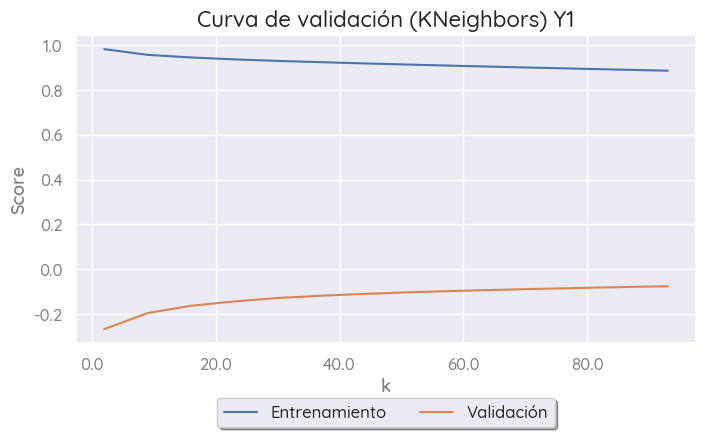

In [71]:
np.mean(train_scores,axis=1), np.mean(test_scores,axis=1)

fig, ax = plt.subplots(figsize = (8,4))
ax.set_title("Curva de validación (KNeighbors) Y1",size = 16,fontproperties=prop1, fontweight ="bold")    

ax.plot(k,np.mean(train_scores,axis=1),label="Entrenamiento")
ax.plot(k,np.mean(test_scores,axis=1),label="Validación")
ax.set_yticklabels(ax.get_yticks().round(2), fontproperties=prop1,color='gray',size = 12)
ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12)
ax.set_xlabel("k", size = 13,fontproperties=prop2, fontweight ="bold", color = 'gray')
ax.set_ylabel("Score", size = 13,fontproperties=prop2, fontweight ="bold", color = 'gray')
# ax.set_xticks(np.arange(49),k)
_= ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax.grid(True);

In [143]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(KNeighborsRegressor(), X, Y2, param_name='n_neighbors', param_range=k, cv=6)

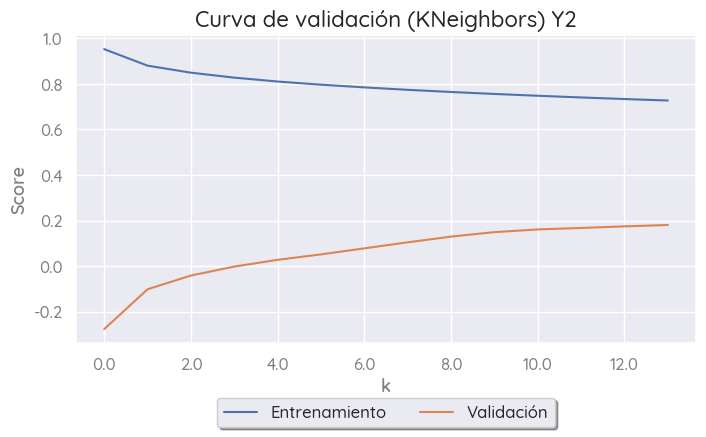

In [146]:
np.mean(train_scores,axis=1), np.mean(test_scores,axis=1)

fig, ax = plt.subplots(figsize = (8,4))
ax.set_title("Curva de validación (KNeighbors) Y2",size = 16,fontproperties=prop1, fontweight ="bold")    
ax.set_xlabel("k", size = 13,fontproperties=prop2, fontweight ="bold", color = 'gray')
ax.set_ylabel("Score", size = 13,fontproperties=prop2, fontweight ="bold", color = 'gray')
ax.plot(np.mean(train_scores,axis=1),label="Entrenamiento")
ax.plot(np.mean(test_scores,axis=1),label="Validación")
ax.set_yticklabels(ax.get_yticks().round(2), fontproperties=prop1,color='gray',size = 12)
ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12)
#plt.ylim(0, 1)
# ax.set_xticks(np.arange(49),k)
_= ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)
ax.grid(True);

In [75]:
from sklearn.svm import LinearSVR
param_range = np.logspace(-1, 0.5, 5)
train_scores, test_scores = validation_curve(LinearSVR(), X, Y1, param_name="C", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

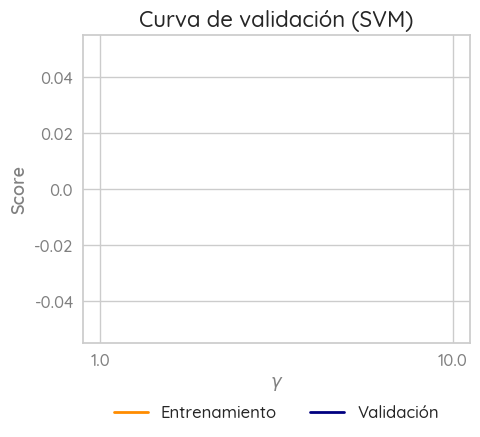

In [174]:
fig, ax = plt.subplots(figsize = (5,4))
ax.set_title("Curva de validación (SVL)", size = 16,fontproperties=prop1, fontweight ="bold")
ax.set_xlabel(r"$\gamma$",  size = 13,fontproperties=prop2, fontweight ="bold", color = 'gray' )
ax.set_ylabel("Score",  size = 13,fontproperties=prop2, fontweight ="bold", color = 'gray')

# ax.set_ylim(0.0, 1.1)
lw = 2
ax.semilogx(param_range, train_scores_mean, label="Entrenamiento",color="darkorange", lw=lw)
ax.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
ax.semilogx(param_range, test_scores_mean, label="Validación", color="navy", lw=lw)
ax.fill_between(param_range, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
ax.set_yticklabels(ax.get_yticks().round(2), fontproperties=prop1,color='gray',size = 12)
ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12)

_= ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)

In [72]:
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.datasets import load_energy

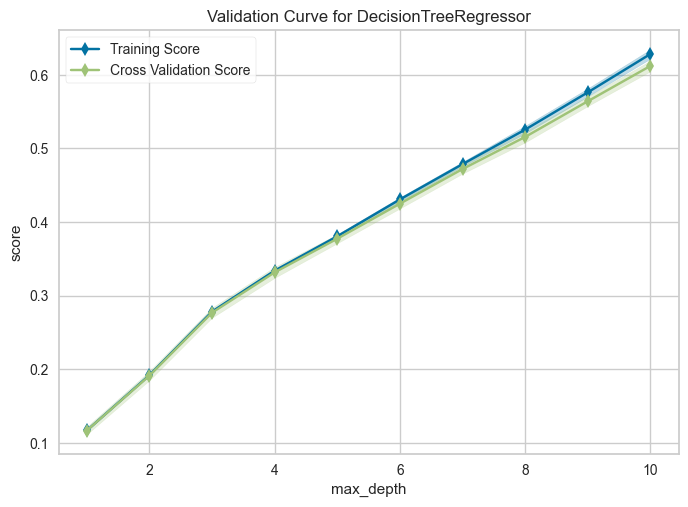

In [73]:
from sklearn.tree import DecisionTreeRegressor
viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=np.arange(1, 11), cv=12, scoring="r2")
viz.fit(X_train, y_train1)
viz.show();

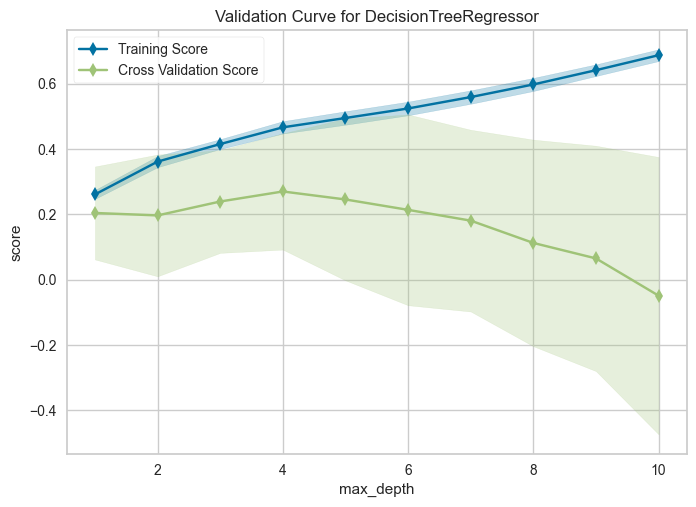

In [175]:
from sklearn.tree import DecisionTreeRegressor
viz = ValidationCurve(DecisionTreeRegressor(), param_name="max_depth", param_range=np.arange(1, 11), cv=10, scoring="r2")
viz.fit(X2, Y2)
viz.show();

# Funciones para selección de hiperparámetros

## Grid Search


In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
alphas = np.array([310, 100, 10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X1, Y1)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

-0.005873005889804594
0.01


In [180]:
alphas = np.array([310, 100, 10,1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Lasso()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X2, Y2)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.3337228710253342
0.0


## Random Search
El método de *Random search* selecciona aleatoriamente valores del hiperparámetro de una distribución uniforme por un número especificado de iteracciones. Un modelo es construido y evaluado para cada combinación de parámetros seleccionados.

In [181]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [182]:
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=1)
rsearch.fit(X1, Y1)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

-7.253409440602409
0.9888610889064947


In [186]:
param_grid = {'alpha': uniform()}
model = Ridge()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=1)
rsearch.fit(X2, Y2)
print(rsearch.best_score_)
print(rsearch.best_estimator_.alpha)

0.3337228673404751
0.00011437481734488664


## Métrica para metodos de regresión

### Mean Absolute Error
El error medio absoluto (MAE) es la suma de las diferencias absolutas entre las predicciones y las observaciones. Da una idea de que tan equivocado puede estar el modelo, define la magnitud pero no la direccion, (*over* o *under fitting*).

In [195]:
kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, X1, Y1, cv=kfold, scoring='neg_mean_absolute_error')
print(results)
print(results.mean())
print(results.std())

[-0.90386233 -0.18850177 -0.19081603 -0.23521252 -0.20531737]
-0.3447420068963688
0.2800555984016785


In [194]:
kfold = KFold(n_splits=10)
model = LinearRegression()
results = cross_val_score(model, X2, Y2, cv=kfold, scoring='neg_mean_absolute_error')
print(results)
print(results.mean())
print(results.std())

[-92.06329974 -42.09677824 -35.53085815 -39.72326646 -42.06191254
 -41.54703003 -60.90854629 -53.97838958 -49.97414461 -31.86374088]
-48.97479665290235
16.536182937018577


### Mean Squared Error
El error medio cuadrático (MSE) es mas como el error medio absoluto ya qu da una idea de la magnitud del error en las unidades del problema, tambien es denominado *Root Mean Squared Error -RMSE-*.

In [196]:
kfold = KFold(n_splits=5)
results = cross_val_score(model, X1, Y1, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())
print(results.std())

-0.38482987771719107
0.6362476508398203


In [198]:
kfold = KFold(n_splits=5)
results = cross_val_score(model, X2, Y2, cv=kfold, scoring='neg_mean_squared_error')
print(results.mean())
print(results.std())

-4211.743137562952
1108.69138857825


### R2 Metric
Finalmente el R2 (R cuadrado) provee una buena indicación del la bondad del ajuste de las predicciones a las observaciones, y varía entre 0 y 1.

In [240]:
x1_1 = X1.copy()

In [215]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

In [242]:
data15 = X1[['temp','sal']]
st = Normalizer()
df_std= st.fit_transform(data15)
X1['temp'] = df_std[:,0]
X1['sal'] = df_std[:,1]


In [245]:
kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, x1_1, Y1, cv=kfold, scoring='r2')
print(results.mean())
print(results.std())

-7.255197734868938
14.647374355203178


# 11: Bias - Variance Trade Off

In [255]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [262]:
X_train1,X_test1, y_train1,y_test1 = train_test_split(X1,Y1, random_state=1)
train_score=lr.score(X_train1, y_train1)
test_score=lr.score(X_test1, y_test1)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: -176078.91508448857
Test score: -175377.22963096589


In [263]:
kn = KNeighborsRegressor()
kn.fit(X_train1, y_train1)
train_score=kn.score(X_train1, y_train1)
test_score=kn.score(X_test1, y_test1)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.7009630669080937
Test score: 0.5516275145943438


In [294]:
X_train2,X_test2, y_train2,y_test2 = train_test_split(X2,Y2, random_state=1)
train_score=lr.score(X_train2, y_train2)
test_score=lr.score(X_test2, y_test2)
print('Train score:', train_score)
print('Test score:', test_score)

Train score: 0.3595956056421825
Test score: 0.36486354592551595


In [287]:
kfold = KFold(n_splits=5)
model = LinearRegression()
results = cross_val_score(model, X2, Y2, cv=kfold, scoring='r2')
print(results.mean())
print(results.std())

0.33372287102533493
0.11887931715515411


# Curva de aprendizaje (*Learning curve*)

La curva de aprendizaje permite visualizar el efecto del número de observaciones en el desempeño del modelo. Generalmente se utiliza con los datos de entrenamiento y con los datos de validación para determinar si el modelo se subajusta o sobreajusta a los datos.

En este caso se trabajará para la selección de los datos de entrenamiento y validación con *cross validation*, razón por la cual en la función de *learning_curve* se debe adicionar no solo el modelo a utilizar y los datos, sino ademas el número de subgrupos en los cuales se dividirán los datos para correr el modelo, en este caso 5.

In [297]:
from sklearn.model_selection import learning_curve

lc = learning_curve(KNeighborsRegressor(n_neighbors=5),X_train1,y_train1,cv=5)
samples, train, test = lc[0], lc[1], lc[2]
lc

(array([ 12981,  42189,  71397, 100605, 129813]),
 array([[0.6059619 , 0.59818883, 0.59818883, 0.59818883, 0.59818883],
        [0.6655901 , 0.66579364, 0.66682661, 0.66682661, 0.66682661],
        [0.68425521, 0.68404   , 0.68482855, 0.68328161, 0.68328161],
        [0.69345472, 0.69182955, 0.69266998, 0.69228904, 0.69168654],
        [0.6981934 , 0.69659316, 0.69778809, 0.69733077, 0.69662153]]),
 array([[0.40352962, 0.39912167, 0.39931808, 0.40516918, 0.40335473],
        [0.49216647, 0.49098792, 0.48787897, 0.48895475, 0.49090783],
        [0.5205311 , 0.52314136, 0.51764381, 0.51882762, 0.51867143],
        [0.53459199, 0.53727178, 0.53120236, 0.5322096 , 0.5323874 ],
        [0.54134414, 0.54938809, 0.53690953, 0.5438145 , 0.54146453]]))

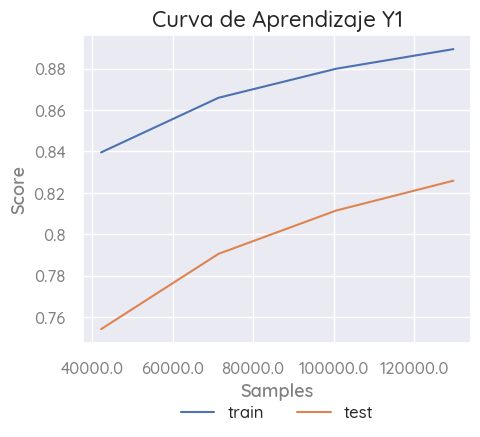

In [302]:
# sns.set()
fig, ax = plt.subplots(figsize = (5,4))
ax.set_title("Curva de Aprendizaje Y1", size = 16,fontproperties=prop1, fontweight ="bold")
ax.set_xlabel(r"Samples",  size = 13,fontproperties=prop2, fontweight ="bold", color = 'gray' )
ax.set_ylabel("Score",  size = 13,fontproperties=prop2, fontweight ="bold", color = 'gray')
ax.plot(samples[1:],np.mean(train,axis=1)[1:], label = 'train')
ax.plot(samples[1:],np.mean(test,axis=1)[1:], label = 'test');
ax.set_yticklabels(ax.get_yticks().round(2), fontproperties=prop1,color='gray',size = 12)
ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12);
_= ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)

In [299]:
lc = learning_curve(KNeighborsRegressor(n_neighbors=5),X_train2,y_train2,cv=5)
samples, train, test = lc[0], lc[1], lc[2]
lc

(array([ 12981,  42189,  71397, 100605, 129813]),
 array([[0.78168441, 0.77912205, 0.77912205, 0.77912205, 0.77912205],
        [0.8437856 , 0.83979677, 0.83808021, 0.83808021, 0.83808021],
        [0.86683248, 0.86632624, 0.86505313, 0.86578593, 0.86578593],
        [0.8809768 , 0.87968145, 0.87973035, 0.87970879, 0.87968875],
        [0.88926733, 0.88966179, 0.8898796 , 0.88879503, 0.88963535]]),
 array([[0.64690114, 0.6604825 , 0.66166015, 0.66065795, 0.6621769 ],
        [0.74682403, 0.75549987, 0.75701555, 0.75093971, 0.76063363],
        [0.78600923, 0.79135536, 0.79172584, 0.79153132, 0.79217954],
        [0.80438081, 0.8114113 , 0.81423626, 0.81369333, 0.81344349],
        [0.82104298, 0.82623006, 0.82710734, 0.82762391, 0.82748195]]))

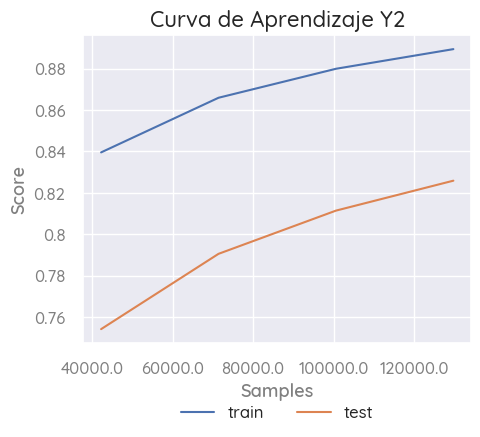

In [301]:
fig, ax = plt.subplots(figsize = (5,4))
ax.set_title("Curva de Aprendizaje Y2", size = 16,fontproperties=prop1, fontweight ="bold")
ax.set_xlabel(r"Samples",  size = 13,fontproperties=prop2, fontweight ="bold", color = 'gray' )
ax.set_ylabel("Score",  size = 13,fontproperties=prop2, fontweight ="bold", color = 'gray')
ax.plot(samples[1:],np.mean(train,axis=1)[1:], label = 'train')
ax.plot(samples[1:],np.mean(test,axis=1)[1:], label = 'test');
ax.set_yticklabels(ax.get_yticks().round(2), fontproperties=prop1,color='gray',size = 12)
ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12);
_= ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=4, fontsize = 10,prop=prop1)

# 12: Clustering

*Clustering* corresponde a un modelo no supervisado, por lo tanto no existen *labels* en la base de datos, y se refiere a partir los datos en grupos mas pequeños denominados *cluster*. El objetivo es que la partición de los datos sea de tal forma que los datos de cada *cluster* sean muy similares entre si y muy diferentes a los datos de los otros *cluster*.

In [76]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn import preprocessing
from sklearn.metrics import silhouette_samples, silhouette_score

## Kmeans

El método *k-means* se basa en maximizar la distancia entre los puntso centrales de los cluster y simultaneamente minimizar la varianza entre los cluster. Como limitante tiene que previamente se debe establecer el numero *k*. Se implementa de la siguiente manera:

In [81]:
km = KMeans(n_clusters=20)
model=km.fit(X_train)
y_kmeans=model.fit_predict(X_train)

centroids = model.cluster_centers_
print(centroids)
print('número de datos asignados a cada centroide:')
print(np.bincount(y_kmeans))

[[ 2.39718594e-02  2.73928066e+01  1.39032826e+00  6.97749081e+00]
 [ 2.20989434e-02  2.20989434e-02  1.39202572e-02  1.39202572e-02]
 [-5.51499956e-02  2.88720424e+01  9.66916972e-01  3.96418961e+00]
 [ 3.50504921e-02  2.67939533e+01  2.15617506e+00  1.00347945e+01]
 [ 1.85405088e-02  2.82222026e+01  1.56218019e+00  7.81146089e+00]
 [ 2.08152671e-02  2.88550066e+01  1.12130552e+00  6.24441968e+00]
 [-2.51881496e-02  2.90486935e+01  9.56372509e-01  5.22773842e+00]
 [ 8.92467007e-02  2.69225420e+01  1.90657042e+00  8.95003929e+00]
 [ 1.00825099e-01  2.88361441e+01  1.25400985e+00  7.13162573e+00]
 [-2.94591910e-02  2.89597408e+01  8.34910484e-01  3.09625938e+00]
 [ 1.94780752e-02  2.79022165e+01  1.07833033e+00  2.91685408e+00]
 [-8.08487383e-02  2.81933715e+01  1.37910063e+00  6.81981205e+00]
 [ 9.10842495e-02  2.80634470e+01  1.78006603e+00  8.66093944e+00]
 [ 7.27900168e-02  2.78211572e+01  2.00657196e+00  9.61869562e+00]
 [ 1.24153779e-01  2.71148299e+01  1.70004616e+00  7.96974228e

In [83]:
y_kmeans==0,0

(array([False, False, False, ..., False, False, False]), 0)

In [80]:
plt.scatter(X_train[y_kmeans==0,0],X_train[y_kmeans==0,1],s=100,c='red',label='cluster 1')
plt.scatter(X_train[y_kmeans==1,0],X_train[y_kmeans==1,1],s=100,c='blue',label='cluster 2')
plt.scatter(X_train[y_kmeans==2,0],X_train[y_kmeans==2,1],s=100,c='green',label='cluster 3')
plt.scatter(X_train[y_kmeans==3,0],X_train[y_kmeans==3,1],s=100,c='yellow',label='cluster 4')
# plt.scatter(X_train[y_kmeans==4,0],X_train[y_kmeans==4,1],s=100,c='brown',label='cluster 5')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=300,c='black', label='centroids')
plt.title('Cluster')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.legend();

InvalidIndexError: (array([ True,  True, False, ..., False,  True,  True]), 0)

## Hierarchical clustering

### Matriz de Distancias

In [333]:
from scipy.spatial import distance_matrix
dd1=pd.DataFrame(distance_matrix(X1[:16159],X1[:16159],p=1))  ##distancia de Manhattan
dd1.head()

,0,1,2,3,4,5,6,7,8,9,...,16149,16150,16151,16152,16153,16154,16155,16156,16157,16158
0,0.000000,0.008572,0.014901,0.026570,0.034541,0.045167,0.056354,0.067781,0.080215,0.091933,...,0.175688,0.169077,0.169544,0.172931,0.174485,0.173498,0.204234,0.203160,0.201844,0.199971
1,0.008572,0.000000,0.012216,0.023884,0.031856,0.042482,0.053669,0.065095,0.077529,0.089248,...,0.173002,0.166391,0.166859,0.170245,0.171800,0.170812,0.212805,0.211732,0.210415,0.208543
2,0.014901,0.012216,0.000000,0.011669,0.019640,0.030266,0.041453,0.052880,0.065314,0.077032,...,0.160787,0.154175,0.154643,0.158030,0.159584,0.158596,0.216647,0.215573,0.214257,0.212384
3,0.026570,0.023884,0.011669,0.000000,0.011980,0.021419,0.030183,0.041211,0.053645,0.065363,...,0.149118,0.142507,0.142974,0.146361,0.147915,0.146928,0.224015,0.222941,0.221625,0.219752
4,0.034541,0.031856,0.019640,0.011980,0.000000,0.010626,0.021813,0.033239,0.045674,0.057392,...,0.141146,0.134535,0.135003,0.138389,0.139944,0.138956,0.235994,0.234921,0.233604,0.231732


In [334]:
dd2=pd.DataFrame(distance_matrix(X1[:16159],X1[:16159],p=2)) #distancia Euclidiana
dd2.head()

,0,1,2,3,4,5,6,7,8,9,...,16149,16150,16151,16152,16153,16154,16155,16156,16157,16158
0,0.000000,0.006352,0.013714,0.023423,0.033180,0.043229,0.053255,0.063207,0.073228,0.083082,...,0.139143,0.137683,0.142951,0.150845,0.156532,0.159103,0.159198,0.155316,0.151817,0.148427
1,0.006352,0.000000,0.009055,0.018656,0.027861,0.037877,0.047925,0.057914,0.068013,0.077904,...,0.134795,0.133098,0.138117,0.145806,0.151348,0.153819,0.165498,0.161645,0.158163,0.154778
2,0.013714,0.009055,0.000000,0.009758,0.019494,0.029536,0.039550,0.049496,0.059515,0.069373,...,0.125820,0.124203,0.129344,0.137167,0.142826,0.145390,0.171695,0.167563,0.163806,0.160162
3,0.023423,0.018656,0.009758,0.000000,0.010175,0.020058,0.029984,0.039876,0.049839,0.059677,...,0.116139,0.114466,0.119586,0.127425,0.133117,0.135715,0.180139,0.175810,0.171855,0.168019
4,0.033180,0.027861,0.019494,0.010175,0.000000,0.010050,0.020089,0.030066,0.040152,0.050042,...,0.107602,0.105594,0.110374,0.117960,0.123488,0.125982,0.190274,0.185906,0.181901,0.178008


In [342]:
from scipy.cluster.hierarchy import dendrogram,linkage
Z=linkage(X1[:16159],method='ward',metric='euclidean') # matriz Z con todos los enlaces creados
Z[:17]

array([[3.64800000e+03, 5.80500000e+03, 1.46981553e-05, 2.00000000e+00],
       [8.07700000e+03, 8.07800000e+03, 1.68249869e-05, 2.00000000e+00],
       [1.62900000e+03, 1.44580000e+04, 1.81942799e-05, 2.00000000e+00],
       [6.34000000e+02, 6.75500000e+03, 1.81942799e-05, 2.00000000e+00],
       [1.30120000e+04, 1.31100000e+04, 2.88591609e-05, 2.00000000e+00],
       [4.57000000e+03, 5.57400000e+03, 2.93963106e-05, 2.00000000e+00],
       [2.92000000e+03, 3.01500000e+03, 3.18021575e-05, 2.00000000e+00],
       [1.24550000e+04, 1.36250000e+04, 3.18021575e-05, 2.00000000e+00],
       [1.31990000e+04, 1.32950000e+04, 3.18255257e-05, 2.00000000e+00],
       [9.87400000e+03, 1.50160000e+04, 3.28063854e-05, 2.00000000e+00],
       [7.91000000e+02, 8.66000000e+02, 3.74850374e-05, 2.00000000e+00],
       [2.09900000e+03, 1.55030000e+04, 4.01725127e-05, 2.00000000e+00],
       [3.11900000e+03, 3.21600000e+03, 4.14619659e-05, 2.00000000e+00],
       [2.48900000e+03, 3.65600000e+03, 4.16181559e

In [344]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
C, coph_dist=cophenet(Z,pdist(X1[:16159])) #Coeficiente de Cophenet
C

0.9991209285318051

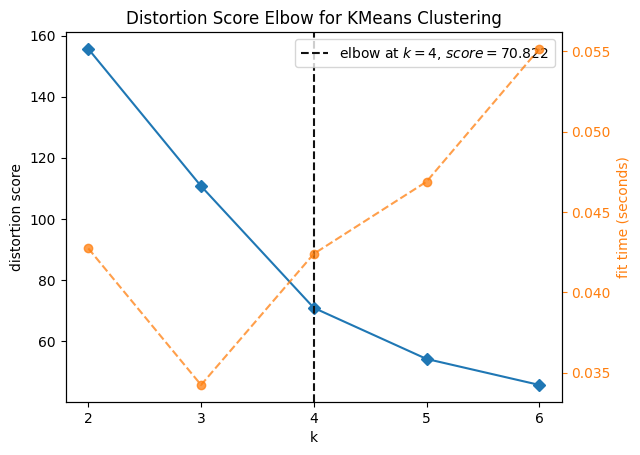

In [413]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

visualizer = KElbowVisualizer(KMeans(), k=(2,7),ax=ax)
visualizer.fit(X1[:16159])

ax.set_xticks(range(2,7))
visualizer.show()
plt.show()

### Dendrograma

Una herramienta muy utilizada es el dendrograma, que despliega la relación de agrupamiento entre todos los datos. Cualquier línea horizontal que corte las líneas de color representa el número de *cluster* que se definen de acuerdo con la distancia entre ellos.  
Utilizando entonces la matriz Z de los enlaces creados se crea el dendrograma. Se puede definir el umbral para el color como un porcentaje de la distancia mayor (83), tambien truncarlo con los ultimos cluster formados (6). En cada *leaf* señala el numero de observaciones que tiene en cada cluster.

In [414]:
X

array([276.47998047, 276.79998779, 277.11999512, 277.44000244,
       277.76000977, 278.08001709, 278.40002441, 278.7199707 ,
       279.03997803, 279.35998535, 279.67999268, 280.        ,
       280.32000732, 280.64001465, 280.96002197, 281.2800293 ,
       281.59997559, 281.91998291, 282.23999023, 282.55999756,
       282.88000488, 283.20001221, 283.52001953, 283.83996582,
       284.16003418, 284.47998047, 284.79998779, 285.11999512])

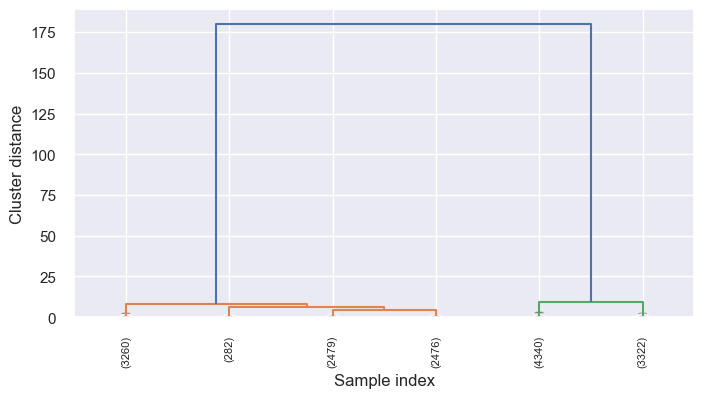

In [348]:
plt.figure(figsize=(8,4))
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');
dendrogram(Z,leaf_rotation=90.,leaf_font_size=8,color_threshold=0.2*83,truncate_mode='lastp',p=6,show_leaf_counts=True,show_contracted=True)
plt.show()

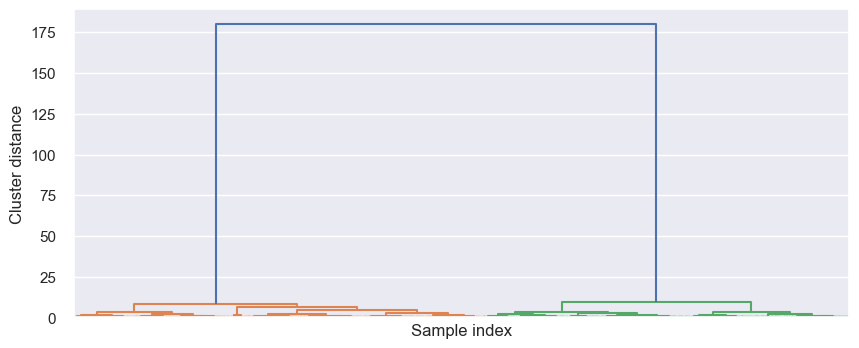

In [351]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,4))
dendrogram=sch.dendrogram(sch.linkage(X1[:16159],method='ward'), no_labels=True, truncate_mode='level')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

# PCA

El PCA es un método de *machine learning* no supervisado  para reducir dimensionalmente un modelo con una gran cantidad de variables. Para esta reducción permite identificar las varibales que mas le aportan a la varianza del modelo. En este ejemplo vamos a utilizar un conjunto de variables importados desde una tabla de Excel.

In [353]:
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [363]:
# data15 = X[['temp','sal']]
# st = Normalizer()
# df_std= st.fit_transform(data15)
# X_scaled = X
# X_scaled['temp'] = df_std[:,0]
# X_scaled['sal'] = df_std[:,1]

In [373]:
scaler=StandardScaler()
ld=scaler.fit(X)
X_scaled=ld.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Los vectores propios de una matriz se pueden obtener de tres formas diferentes. La mas común es obteniendo los vectores propios de la matriz de convarianza.

In [357]:
from IPython.display import display, Math, Latex
print('La matriz de convarianza es:')
display(Math(r'\Sigma = \frac{1}{n-1}((X-\overline{x})^T(X-\overline{x}))'))

La matriz de convarianza es:


<IPython.core.display.Math object>

In [374]:
mean_vect = np.mean(X_scaled, axis=0)
cov_matrix = (X_scaled - mean_vect).T.dot((X_scaled - mean_vect))/(X_scaled.shape[0]-1)
print("La matriz de covarianzas es \n%s"%cov_matrix)

La matriz de covarianzas es 
            waterlevel      temp       sal   hs_wave  dir_wave  vel_wind  \
waterlevel    1.000005  0.119367  0.113378  0.103030  0.339367  0.207369   
temp          0.119367  1.000005  0.988116  0.363521  0.430908  0.374338   
sal           0.113378  0.988116  1.000005  0.474082  0.496931  0.479750   
hs_wave       0.103030  0.363521  0.474082  1.000005  0.441820  0.923249   
dir_wave      0.339367  0.430908  0.496931  0.441820  1.000005  0.567690   
vel_wind      0.207369  0.374338  0.479750  0.923249  0.567690  1.000005   
dir_wind      0.124300  0.421955  0.481005  0.544603  0.501297  0.654836   
mes           0.024225  0.316935  0.306758  0.038894  0.317178  0.119146   

            dir_wind       mes  
waterlevel  0.124300  0.024225  
temp        0.421955  0.316935  
sal         0.481005  0.306758  
hs_wave     0.544603  0.038894  
dir_wave    0.501297  0.317178  
vel_wind    0.654836  0.119146  
dir_wind    1.000005  0.212070  
mes         0.212070  

In [377]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[3.88208454e+00 1.29470386e+00 1.03724565e+00 8.30581479e-01
 3.23324278e-03 5.42549872e-02 4.23979529e-01 4.73953683e-01]
Vectores propios 
[[ 1.39452220e-01  1.50200930e-01  8.62539271e-01 -2.88312060e-01
   2.13165308e-02 -5.56353516e-02  3.45023051e-01  9.11280898e-02]
 [ 3.86741505e-01 -4.53422095e-01 -1.18702753e-01 -4.04190085e-01
  -6.78229307e-01  6.88579854e-02  4.88406054e-02  1.60506843e-02]
 [ 4.21038946e-01 -3.72095994e-01 -1.45039460e-01 -3.60750138e-01
   7.28715796e-01 -1.12902193e-02 -5.43845919e-03  4.37025472e-02]
 [ 3.91305578e-01  4.21432067e-01 -2.40709991e-01  2.60547332e-02
  -8.15483110e-02 -6.38470078e-01  6.83570149e-02  4.37821835e-01]
 [ 3.76747106e-01  1.55515963e-02  3.41362186e-01  1.93984438e-01
  -4.23678445e-02 -8.45911570e-02 -8.13883722e-01 -1.79733833e-01]
 [ 4.24200548e-01  4.10331994e-01 -1.01057093e-01  1.19079575e-01
   4.36949271e-04  7.49975558e-01  5.74514432e-02  2.48042077e-01]
 [ 3.82070875e-01  1.54607123e-01 -9.1675132

In [378]:
u,s,v = np.linalg.svd(X_scaled[X_scaled['mes']==1].T)

## PCA usando *Scikitlearn*

In [379]:
len(X.columns)

8

In [380]:
n = len(X.columns) # número de features
pca = PCA(n_components=n).fit(X_scaled)
print(pca.components_)

[[-1.39452220e-01 -3.86741505e-01 -4.21038946e-01 -3.91305578e-01
  -3.76747106e-01 -4.24200548e-01 -3.82070875e-01 -1.80907703e-01]
 [ 1.50200930e-01 -4.53422095e-01 -3.72095994e-01  4.21432067e-01
   1.55515963e-02  4.10331994e-01  1.54607123e-01 -5.13098537e-01]
 [ 8.62539271e-01 -1.18702753e-01 -1.45039460e-01 -2.40709991e-01
   3.41362186e-01 -1.01057093e-01 -9.16751321e-02  1.66772031e-01]
 [ 2.88312060e-01  4.04190085e-01  3.60750138e-01 -2.60547332e-02
  -1.93984438e-01 -1.19079575e-01 -2.19389448e-01 -7.23011330e-01]
 [ 9.11280898e-02  1.60506843e-02  4.37025472e-02  4.37821835e-01
  -1.79733833e-01  2.48042077e-01 -7.84789104e-01  2.96845270e-01]
 [-3.45023051e-01 -4.88406054e-02  5.43845919e-03 -6.83570149e-02
   8.13883722e-01 -5.74514432e-02 -3.79338914e-01 -2.53507472e-01]
 [ 5.56353516e-02 -6.88579854e-02  1.12902193e-02  6.38470078e-01
   8.45911570e-02 -7.49975558e-01  1.17384525e-01  3.15221682e-02]
 [-2.13165308e-02  6.78229307e-01 -7.28715796e-01  8.15483110e-02
   

In [381]:
print(pca.explained_variance_ratio_)

[4.85258324e-01 1.61837235e-01 1.29655108e-01 1.03822205e-01
 5.92439365e-02 5.29971961e-02 6.78184205e-03 4.04153479e-04]


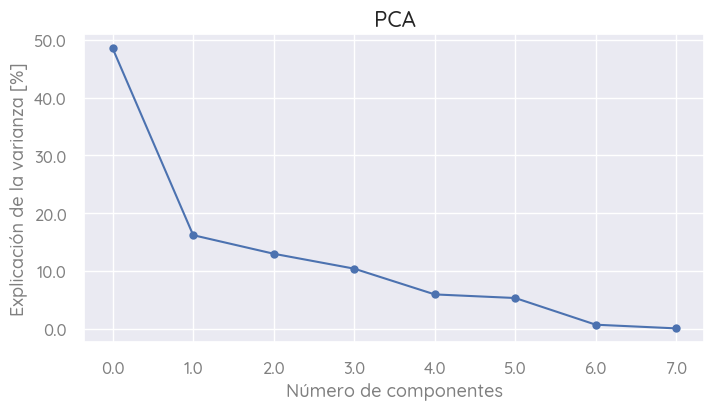

In [389]:
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(pca.explained_variance_ratio_, marker = 'o')
ax.set_xlabel('Número de componentes', size = 13,fontproperties=prop1, fontweight ="bold", color = 'gray')
ax.set_ylabel('Explicación de la varianza [%]', size = 13,fontproperties=prop1, fontweight ="bold", color = 'gray')
ax.set_title('PCA', size = 16,fontproperties=prop1, fontweight ="bold")
ax.set_yticklabels((ax.get_yticks()*100).round(2), fontproperties=prop1,color='gray',size = 12)
ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12);

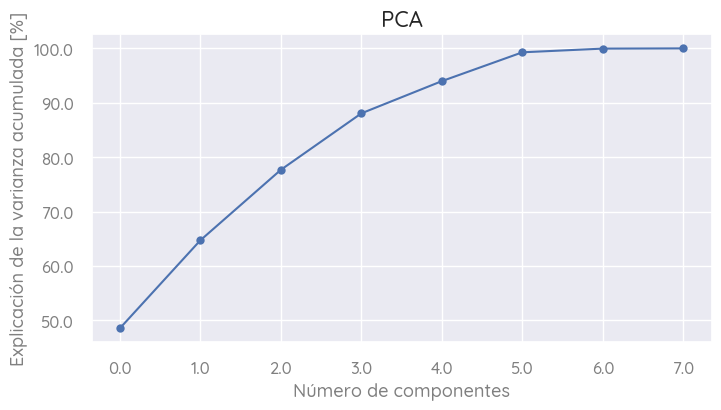

In [392]:
fig, ax = plt.subplots(figsize = (8,4))
ax.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o')
ax.set_xlabel('Número de componentes', size = 13,fontproperties=prop1, fontweight ="bold", color = 'gray')
ax.set_ylabel('Explicación de la varianza acumulada [%]',size = 13,fontproperties=prop1, fontweight ="bold", color = 'gray')
ax.set_title('PCA', size = 16,fontproperties=prop1, fontweight ="bold")
ax.set_yticklabels((ax.get_yticks()*100).round(2), fontproperties=prop1,color='gray',size = 12)
ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='gray',size = 12);


In [393]:
pca_samples = pca.transform(X_scaled)

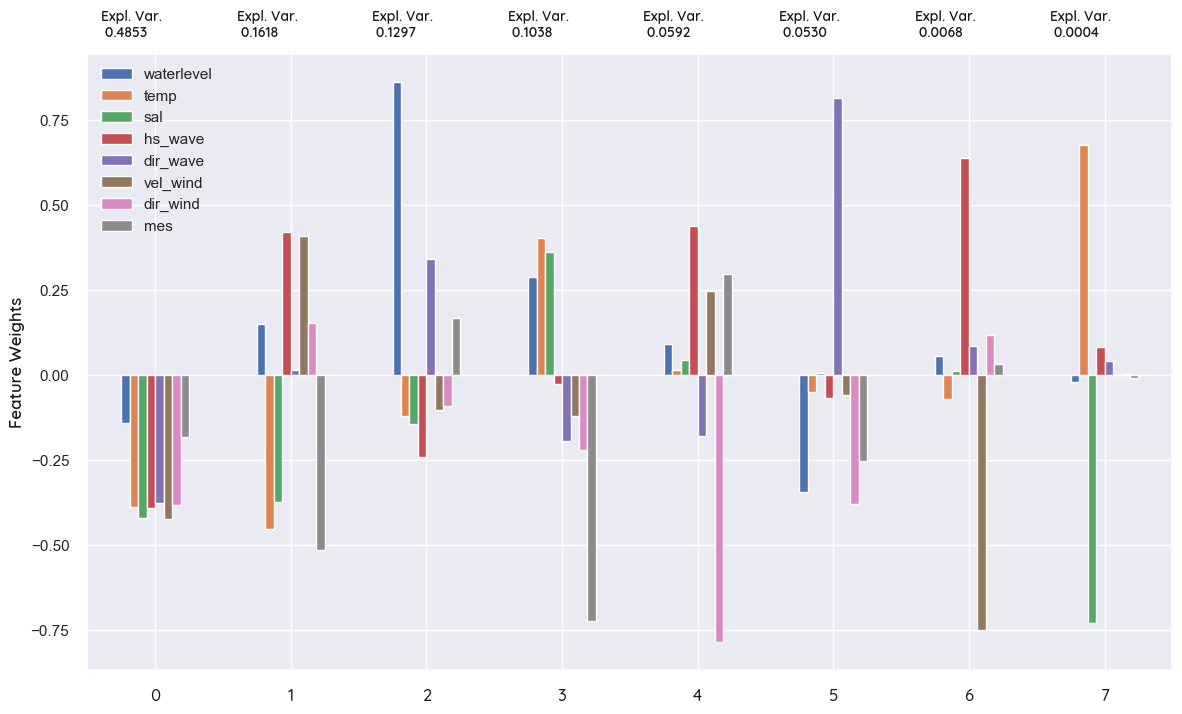

In [404]:
def pca_results(X_scaled, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = X_scaled.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights", fontproperties=prop2,color='k',size = 12) 
    ax.set_xticklabels(dimensions, rotation=0,fontproperties=prop2,color='k',size = 12)
    ax.set_xticklabels(ax.get_xticks(), fontproperties=prop1,color='k',size = 12);


    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev),fontproperties=prop2,color='k',size = 10 )

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X_scaled, pca)

In [27]:
# %%time
# c = cdsapi.Client()

# c.retrieve(
#     'reanalysis-era5-single-levels',
#     {
#         'product_type': 'reanalysis',
#         'format': 'netcdf',
#         'variable': [
#             '10m_u_component_of_wind', '10m_v_component_of_wind',
#         ],
#         'year': [
#              '2021',
#         ],
#         'month': [
#         '01','02','03','04','05','06','07','08','09','10', '11','12'
#         ],
#         'day': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#         'time': [
#             '00:00',
#             '03:00',
#             '06:00',
#             '09:00',
#             '12:00',
#             '15:00',
#             '18:00',
#             '21:00'
#         ],
#         'area':[
#             '16.0','276.48','8.56','285.36',
#         ],
#         'grid':[
#             '0.080','0.040',
#         ],
#     },
#     'data_wind_Caribean_2.nc')

In [28]:
# c = cdsapi.Client()

# c.retrieve(
#     'reanalysis-era5-single-levels',
#     {
#         'product_type': 'reanalysis',
#         'format': 'netcdf',
#         'variable': [
#             'mean_wave_direction', 'peak_wave_period', 'significant_height_of_combined_wind_waves_and_swell',
#         ],
#         'year': [ '2021',
#         ],
#         'month': [
#         '01','02','03','04','05','06','07','08','09','10', '11','12'
#         ],
#         'day': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#         'time': 
#             '00:00/03:00/06:00/09:00/12:00/15:00/18:00/21:00'
#         ,
#         'area':[
#             '16.0','276.48','8.56','285.36',
#         ],
#         'grid':[
#             '0.080','0.040',
#         ],
#         'step' :"0"
#     },
#     'data_wave_Caribean_2.nc')